## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Project: Ensemble Techniques - Term Deposit Subscription Prediction
<a id='shape'></a>

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

###  Load the libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import scipy.stats as stats
sns.set(color_codes=True)
%matplotlib inline

###  Import data files as data frames: 

In [2]:
Bank_Data = pd.read_csv("Bank-full.csv")

In [3]:
Bank_Data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

# Data Quality Checks:

**Check for null values**

In [4]:
Bank_Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no missing values in the dataset.

**Check the Dimension of data**

In [5]:
Bank_Data.shape

(45211, 17)

In [6]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are 45 211 Observations of data input / Rows and 17 data field Attributes / Columns.

**Check the data.describe()**

In [7]:
Bank_Data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

 <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Exploratory Data Analytics (EDA) 

## Univariate Analysis:
Display univariate plots of the attributes: 'Age', 'Balance','day', 'duration', 'campaign', 'pdays' and 'previous', from the respective Banking Data

In [8]:
EDA_Columns = list(Bank_Data)[0:-16] + list(Bank_Data)[5:-11] + list(Bank_Data)[9:-7]  + list(Bank_Data)[11:-2]
print(EDA_Columns)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


**Histogram plots for important independent numeric variables**

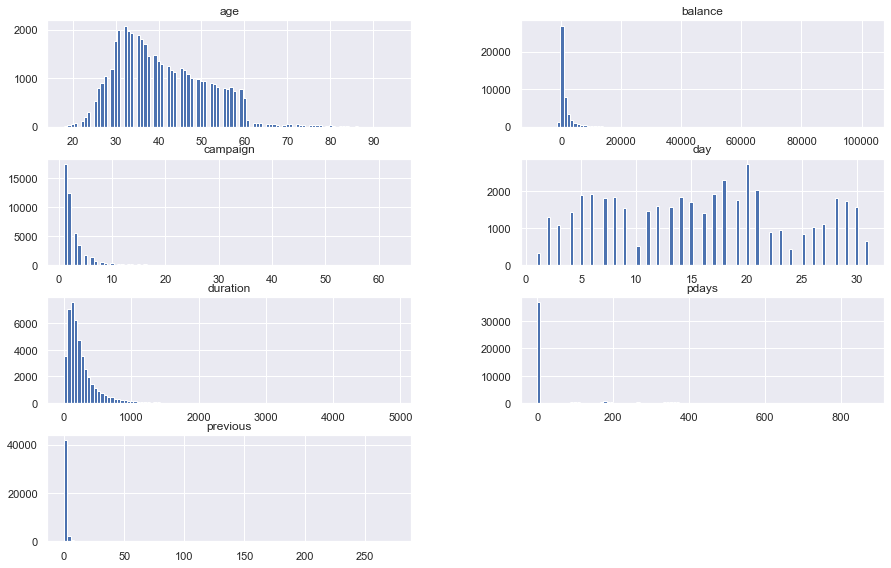

In [9]:
Bank_Data[EDA_Columns].hist(stacked=False, bins=100, figsize=(15,35), layout=(14,2)); 
# Histogram of first 8 columns

#### Univariate Analysis:
Some more features of indexing includes 
- From the above analysis we can see the majority of of customers in the data were not previously contacted. 
- The average number of days that passed by after the client was last contacted from a previous campaign is 40.2
- The campaign ran throughout the days in the month and for the duration of the year. 

**Univariate Analysis Age**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


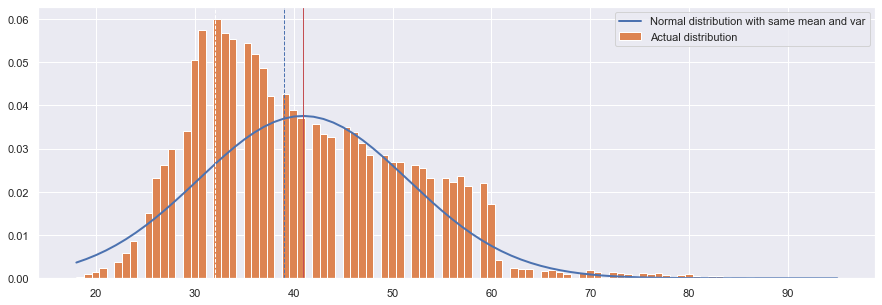

In [10]:
r = np.asarray(Bank_Data['age'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Bank_Data['age'].mean(), color='r', linewidth=1)
plt.axvline(Bank_Data['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Bank_Data['age'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

**Analysis Banking Data for the 'Age' data attribute:**

Some features of the Bank's Customers age include: 
- Mean Age: 40.94
- Minimum Customer Age: 18
- Maximum Customer Age: 95 
- From the above analysis we can see the majority of the banks customers are aged between 35 and 55 years of age 
- There are some outliers, however the age of the banks customers mostly follows a normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


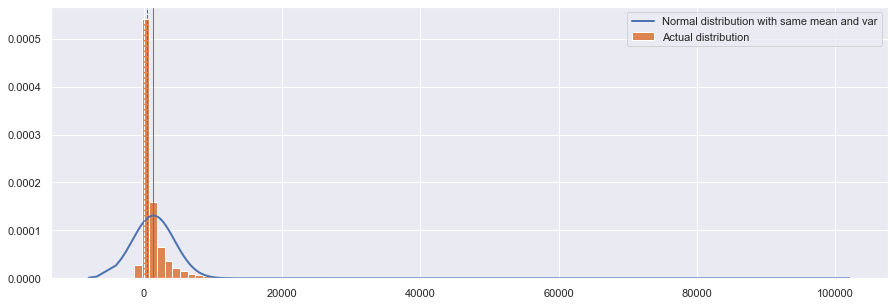

In [11]:
r = np.asarray(Bank_Data['balance'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Bank_Data['balance'].mean(), color='r', linewidth=1)
plt.axvline(Bank_Data['balance'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Bank_Data['balance'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

## Bivariate Analysis

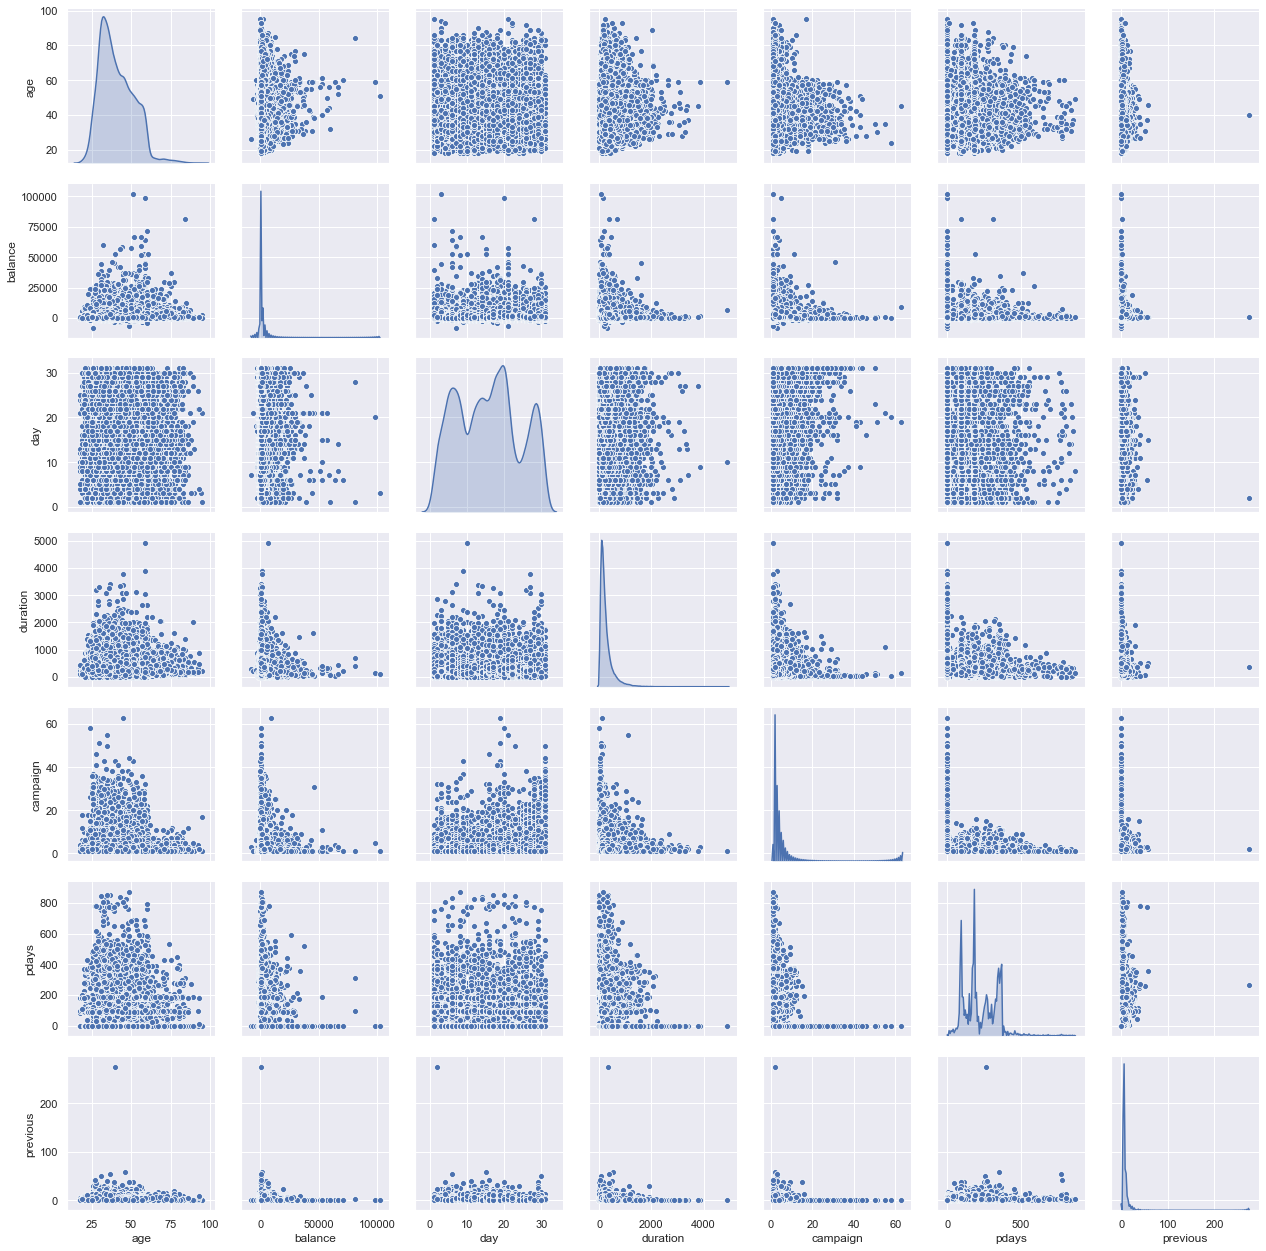

In [12]:
sns.pairplot(Bank_Data,diag_kind='kde')

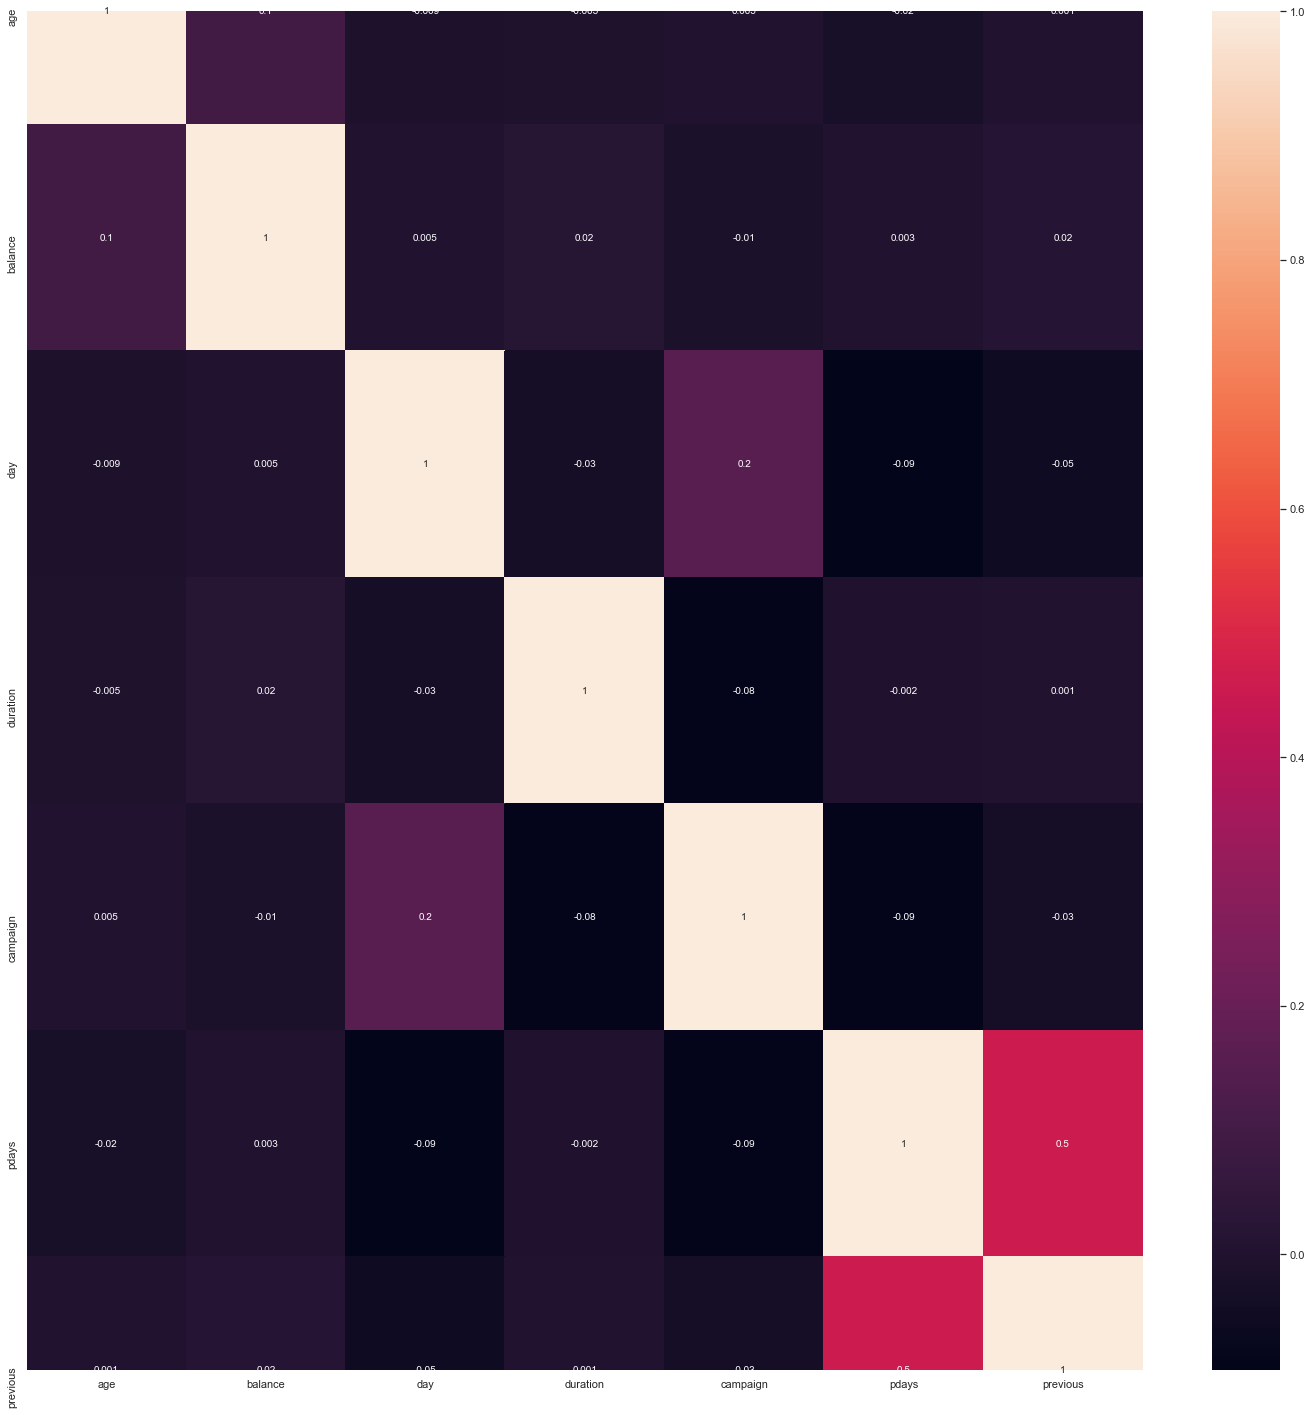

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(Bank_Data.corr(), annot = True, fmt='.1g')

**Bi-variate Analysis Banking Data for the 'job' and 'Target' data attribute:**

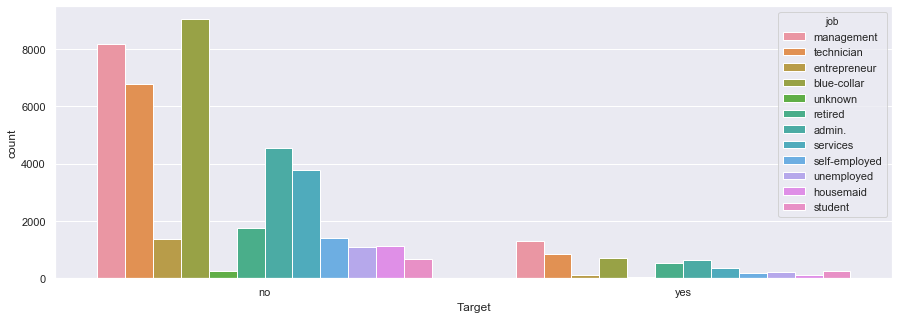

 - Percentage of customers that are students that also hold term deposit:  28.678038379530918
 - Percentage of customers who are retired that also hold term deposit:  22.791519434628977
 - Percentage of customers whom are unemployed that hold term deposit:  15.502686108979278
 - Percentage of customers that are management that also hold term deposit:  13.755550856417848
 - Percentage of customers whom perform admin jobs that also hold term deposit:  12.202668729452718
 - Percentage of customers who are self-employed that also hold term deposit:  11.842938568714375
 - Percentage of customers who are technicians that also hold term deposit:  11.056996182703699
 - Percentage of customers who are in the services industry that also hold term deposit:  8.883004333172845
 - Percentage of customers that are housemaid that also hold term deposit:  8.790322580645162
 - Percentage of customers who are entrepreneurs that also hold term deposit:  8.271687962340282
- Percentage of customers whom per

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='job', x= 'Target')
plt.show()


print(" - Percentage of customers that are students that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'student')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'student'])*100,)
print(" - Percentage of customers who are retired that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'retired')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'retired'])*100,)
print(" - Percentage of customers whom are unemployed that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'unemployed')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'unemployed'])*100,)
print(" - Percentage of customers that are management that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'management')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'management'])*100,)
print(" - Percentage of customers whom perform admin jobs that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'admin.')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'admin.'])*100,)
print(" - Percentage of customers who are self-employed that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'self-employed')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'self-employed'])*100,)
print(" - Percentage of customers who are technicians that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'technician')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'technician'])*100,)
print(" - Percentage of customers who are in the services industry that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'services')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'services'])*100,)
print(" - Percentage of customers that are housemaid that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'housemaid')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'housemaid'])*100,)
print(" - Percentage of customers who are entrepreneurs that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'entrepreneur')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'entrepreneur'])*100,)
print( "- Percentage of customers whom perform blue-collar jobs that also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['job'] == 'blue-collar')].index) / len(Bank_Data.loc[Bank_Data['job'] == 'blue-collar'])*100,)

print("Percentage of overall customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes')].index)/ len(Bank_Data['Target'].index)*100)

##### Analysis:

Job classification has an interesting relationship Some more features of indexing includes 
- From the above analysis we can see job type and term deposit has a correlation
- The job type is therefore determined to be an important feature and will thus be allocated a numerical scale in the model in order of the correlation in the job versus target term deposit relationship demonstrated above. 

**Bi-variate Analysis Banking Data for the 'Marital' status and 'Target' data attribute:**

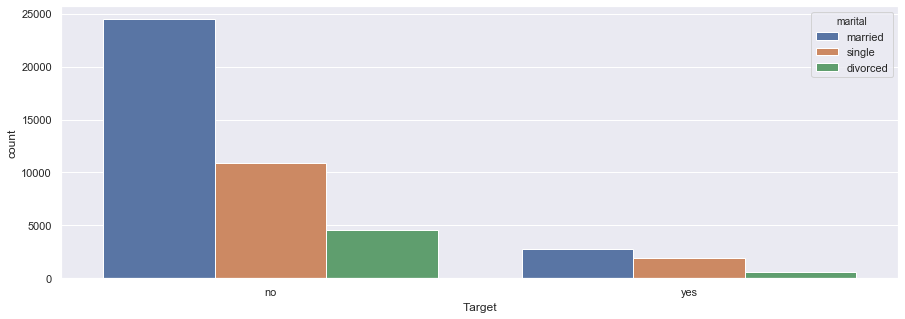

 - Percentage of single customers that hold term deposit:  14.94917904612979
 - Percentage of divorced customers that hold term deposit:  11.945458037257538
 - Percentage of married customers that hold term deposit:  10.123465863158668
Percentage of overall customers that hold term deposit:  11.698480458295547


In [15]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='marital', x= 'Target')
plt.show()

print(" - Percentage of single customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['marital'] == 'single')].index) / len(Bank_Data.loc[Bank_Data['marital'] == 'single'])*100)
print(" - Percentage of divorced customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['marital'] == 'divorced')].index) / len(Bank_Data.loc[Bank_Data['marital'] == 'divorced'])*100)
print(" - Percentage of married customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['marital'] == 'married')].index) / len(Bank_Data.loc[Bank_Data['marital'] == 'married'])*100,)

print("Percentage of overall customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes')].index)/ len(Bank_Data['Target'].index)*100)

##### Analysis:

Maital status has a correlated relationship with response to term deposits.  
- Single customers are more likely to respond to term deposits than married persons. 

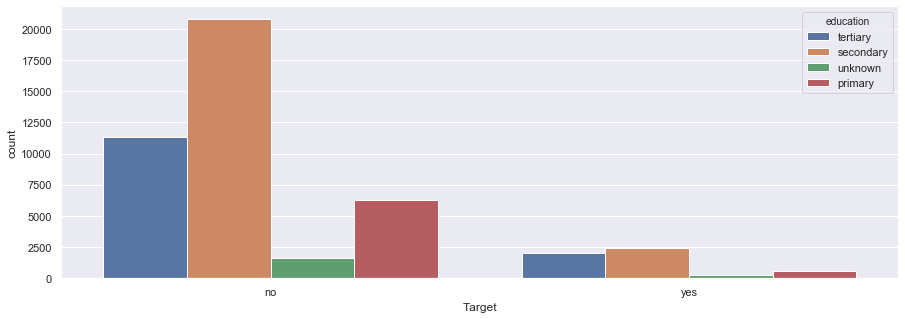

 - Percentage of customers with a 'primary' level of education whom hold term deposit:  8.626477886439936
 - Percentage of customers a 'secondary' level of education whom hold term deposit:  10.559434531505904
 - Percentage of customers a 'tertiary' level of education whom hold term deposit:  15.006390496955117
Percentage of overall customers that hold term deposit:  11.698480458295547


In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='education', x= 'Target')
plt.show()

print(" - Percentage of customers with a 'primary' level of education whom hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['education'] == 'primary')].index) / len(Bank_Data.loc[Bank_Data['education'] == 'primary'])*100)
print(" - Percentage of customers a 'secondary' level of education whom hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['education'] == 'secondary')].index) / len(Bank_Data.loc[Bank_Data['education'] == 'secondary'])*100)
print(" - Percentage of customers a 'tertiary' level of education whom hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['education'] == 'tertiary')].index) / len(Bank_Data.loc[Bank_Data['education'] == 'tertiary'])*100,)

print("Percentage of overall customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes')].index)/ len(Bank_Data['Target'].index)*100)

**Bi-variate Analysis Banking Data for the 'Default' status and 'Target' data attribute:**

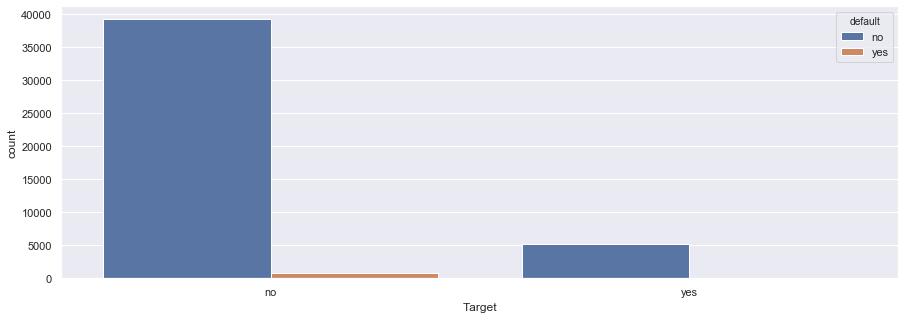

 - Percentage of customers that have defaulted whom also hold term deposit:  6.38036809815951
 - Percentage of customers that have not defaulted whom also hold term deposit:  11.796107757455626
Percentage of overall customers that hold term deposit:  11.698480458295547


In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='default', x= 'Target')
plt.show()

print(" - Percentage of customers that have defaulted whom also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['default'] == 'yes')].index) / len(Bank_Data.loc[Bank_Data['default'] == 'yes'])*100)
print(" - Percentage of customers that have not defaulted whom also hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['default'] == 'no')].index) / len(Bank_Data.loc[Bank_Data['default'] == 'no'])*100)

print("Percentage of overall customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes')].index)/ len(Bank_Data['Target'].index)*100)

##### Analysis:

Default status has a correlated relationship with response to term deposits.  
- Customers whom have defaulted in the past are far less likely to respond to term deposits than married persons. 

**Bi-variate Analysis Banking Data for the 'contact' status and 'Target' data attribute:**

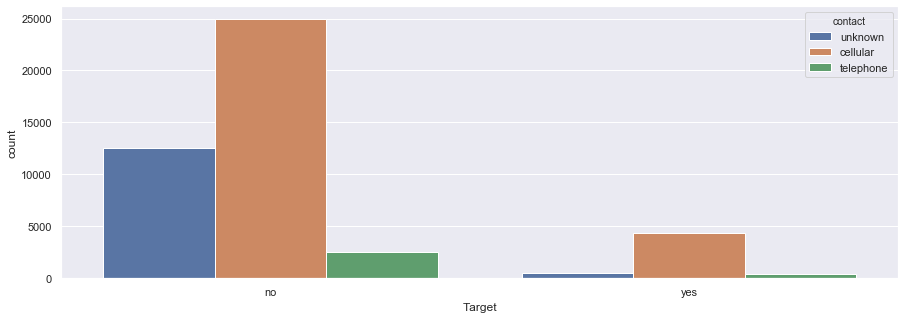

 - Percentage of customers with cellular contact details whom hold term deposit:  14.918900460986853
 - Percentage of customers with unkown contact details whom hold term deposit:  4.070660522273426
 - Percentage of customers with cellular contact details whom hold term deposit:  13.420509291121817
Percentage of overall customers that hold term deposit:  11.698480458295547


In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='contact', x= 'Target')
plt.show()

print(" - Percentage of customers with cellular contact details whom hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['contact'] == 'cellular')].index) / len(Bank_Data.loc[Bank_Data['contact'] == 'cellular'])*100)
print(" - Percentage of customers with unkown contact details whom hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['contact'] == 'unknown')].index) / len(Bank_Data.loc[Bank_Data['contact'] == 'unknown'])*100)
print(" - Percentage of customers with cellular contact details whom hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['contact'] == 'telephone')].index) / len(Bank_Data.loc[Bank_Data['contact'] == 'telephone'])*100)

print("Percentage of overall customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes')].index)/ len(Bank_Data['Target'].index)*100)

##### Analysis:

Persons whom are contactable are far more likely to respond to the term deposit campaign

**Bi-variate Analysis Banking Data for the 'poutcome' status and 'Target' data attribute:**

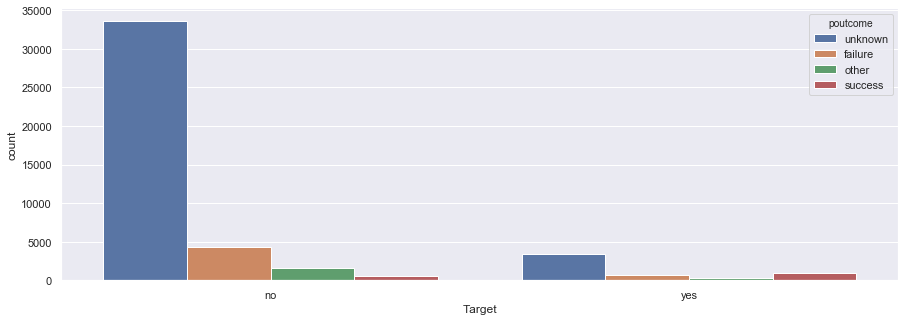

 - Percentage where the outcome of the previous marketing campaign was sucessfull and hold term deposit:  64.72534745201854
 - Percentage where the outcome of the previous marketing campaign failed and hold term deposit:  12.609671495613139
 - Percentage with an other outcome of the previous marketing campaign and hold term deposit:  16.684782608695652
Percentage of overall customers that hold term deposit:  11.698480458295547


In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='poutcome', x= 'Target')
plt.show()

print(" - Percentage where the outcome of the previous marketing campaign was sucessfull and hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['poutcome'] == 'success')].index) / len(Bank_Data.loc[Bank_Data['poutcome'] == 'success'])*100)
print(" - Percentage where the outcome of the previous marketing campaign failed and hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['poutcome'] == 'failure')].index) / len(Bank_Data.loc[Bank_Data['poutcome'] == 'failure'])*100)
print(" - Percentage with an other outcome of the previous marketing campaign and hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes') & (Bank_Data['poutcome'] == 'other')].index) / len(Bank_Data.loc[Bank_Data['poutcome'] == 'other'])*100)

print("Percentage of overall customers that hold term deposit: ",len(Bank_Data[(Bank_Data['Target'] == 'yes')].index)/ len(Bank_Data['Target'].index)*100)

##### Analysis:

Persons for which the previous campaign were successful are far more likely to respond to the term deposit campaign

**Bi-variate Analysis Banking Data for the 'Age' and 'Target' data attribute:**

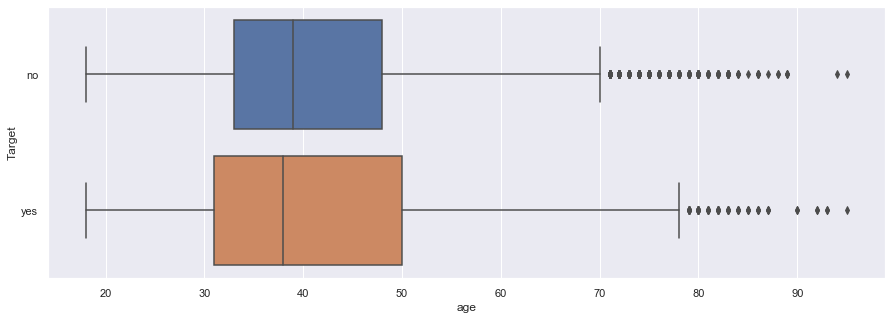

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(data=Bank_Data, y ='Target', x= 'age')
plt.show()

##### Analysis:

- There are clear outliers in the age for both the persons who responded positively and negatively to the term deposit campaign
- A wider age range responded positively to the campaign that those whom responded negatively

**Bi-variate Analysis Banking Data for the 'Duration' of previous marketing campaign call and 'Target' data attribute:**

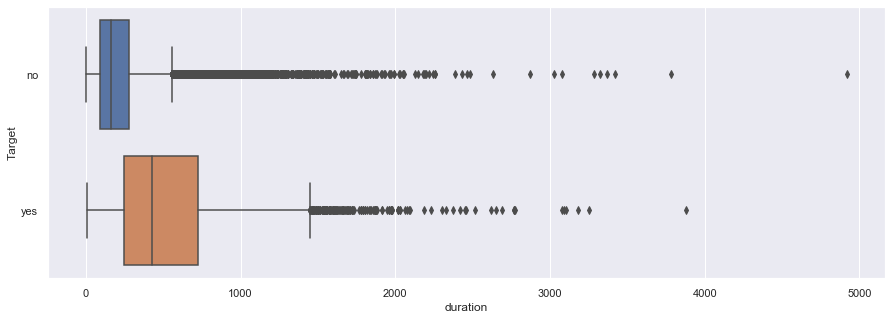

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(data=Bank_Data, y ='Target', x= 'duration')
plt.show()

##### Analysis:

- There are clear outliers in the duration of the previoys calls for both the persons who responded positively and negatively to the term deposit campaign
- The longer the duration of the call the more likely the person responded positively to the term deposit campaign. 

Note the duration is not known before a call is performed. Furthermore, after the end of the call target 'y' is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Bi-variate Analysis Banking Data for the 'loan balance' and 'Target' data attribute:**

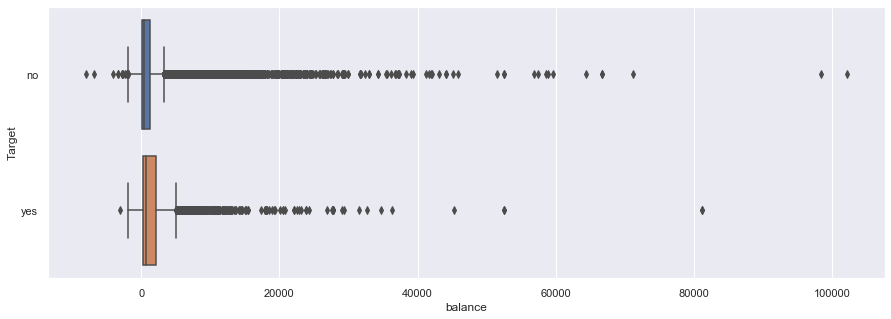

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(data=Bank_Data, y ='Target', x= 'balance')
plt.show()

##### Analysis:

- There are clear outliers in the loan balance data.

No other significant observation is evident

 ## Strategies to address the different data challenges such as data pollution, outliers and missing values.

**Strategies to address missing values data challenges:**

- Encode NAs as -1 or -9999. This works reasonably well for numerical features that are predominantly positive in value, and for tree-based models in general. 
- In case specific scenarios deletion of missing data is effective. Here you simply drop all cases/rows from the dataset that contain missing values. In the case of a very large dataset with very few missing values, this approach could potentially work really well. However, if the missing values are in cases that are also otherwise statistically distinct, this method may seriously skew the predictive model for which this data is used. Another major problem with this approach is that it will be unable to process any future data that contains missing values. If your predictive model is designed for production, this could create serious issues in deployment.
- Replace missing values with the mean/median value of the feature in which they occur.
- Label encode NAs as another level of a categorical variable. This works with tree-based models and other models if the feature can be numerically transformed (one-hot encoding, frequency encoding, etc.). 
- Run predictive models to impute the missing data. 

**Strategies to address missing values data challenges:**
- Outliers in the data should be dropped or alternatively corrected. 
- Outliers may however provide useful information for exploratory analytics

 <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Prepare the data for analytics

**Convert the columns with an 'object' datatype into categorical variables**

In [23]:
for feature in Bank_Data.columns: # Loop through all columns in the dataframe
    if Bank_Data[feature].dtype == 'object': # Only apply for columns with categorical strings
        Bank_Data[feature] = pd.Categorical(Bank_Data[feature])# Replace strings with an integer
Bank_Data.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [24]:
print(Bank_Data.job.value_counts())
print(Bank_Data.marital.value_counts())
print(Bank_Data.education.value_counts())
print(Bank_Data.default.value_counts())
print(Bank_Data.housing.value_counts())
print(Bank_Data.loan.value_counts())
print(Bank_Data.contact.value_counts())
print(Bank_Data.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [25]:
replaceStruct = {
    "job": {"blue-collar": 1, "entrepreneur": 2, "housemaid": 3,"services": 4,"technician": 5, "self-employed": 6, "admin.": 7, "management": 8, "unemployed": 9, "retired": 10,  "student": 11, "unknown": -1},
    "education": {"primary": 1, "secondary": 2, "tertiary": 3, "unknown": -1},
    "default": {"yes": 1, "no":0},
    "housing": {"no": 0, "yes": 1},
    "loan": {"no": 0, "yes": 1},
    "contact": {"telephone": 1, "cellular": 2, "unknown": -1},
    "poutcome": {"failure": 1, "other": 2, "success": 2, "unknown": -1},
    "Target": {"yes": 1, "no":0},
}

oneHotCols=["marital","month"]

In [26]:
Bank_Data=Bank_Data.replace(replaceStruct)
Bank_Data=pd.get_dummies(Bank_Data, columns=oneHotCols)
Bank_Data.head(10)

age  job  education  default  balance  housing  loan  contact  day  \
0   58    8          3        0     2143        1     0       -1    5   
1   44    5          2        0       29        1     0       -1    5   
2   33    2          2        0        2        1     1       -1    5   
3   47    1         -1        0     1506        1     0       -1    5   
4   33   -1         -1        0        1        0     0       -1    5   
5   35    8          3        0      231        1     0       -1    5   
6   28    8          3        0      447        1     1       -1    5   
7   42    2          3        1        2        1     0       -1    5   
8   58   10          1        0      121        1     0       -1    5   
9   43    5          2        0      593        1     0       -1    5   

   duration  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0       261  ...          0          0          0          0          0   
1       151  ...          0          0          0          0          0   
2        76  ...          0          0          0          0          0   
3        92  ...          0          0          0          0          0   
4       198  ...          0          0          0          0          0   
5       139  ...          0          0          0          0          0   
6       217  ...          0          0          0          0          0   
7       380  ...          0          0          0          0          0   
8        50  ...          0          0          0          0          0   
9        55  ...          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  
0          0          1          0          0          0  
1          0          1          0          0          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0  
5          0          1          0          0          0  
6          0          1          0          0          0  
7          0          1          0          0          0  
8          0          1          0          0          0  
9          0          1          0          0          0  

[10 rows x 30 columns]

In [27]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
age                 45211 non-null int64
job                 45211 non-null int64
education           45211 non-null int64
default             45211 non-null int64
balance             45211 non-null int64
housing             45211 non-null int64
loan                45211 non-null int64
contact             45211 non-null int64
day                 45211 non-null int64
duration            45211 non-null int64
campaign            45211 non-null int64
pdays               45211 non-null int64
previous            45211 non-null int64
poutcome            45211 non-null int64
Target              45211 non-null int64
marital_divorced    45211 non-null uint8
marital_married     45211 non-null uint8
marital_single      45211 non-null uint8
month_apr           45211 non-null uint8
month_aug           45211 non-null uint8
month_dec           45211 non-null uint8
month_feb           45211 non-

## Split Data

We will use 70% of data for training and 30% for testing.

In [28]:
X = Bank_Data.drop(["Target", "duration"], axis=1)
y = Bank_Data.pop("Target")


#Note the duration is not known before a call is performed. Furthermore, after the end of the call target 'y' is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Note the duration is not known before a call is performed. Furthermore, after the end of the call target 'y' is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

Lets check split of data

In [30]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Bank_Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Bank_Data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check Personal Loan True/False ratio in split data 

In [31]:
print("Training Term Deposit True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Term Deposit False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Term Deposit True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Term Deposit False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Term Deposit True Values    : 3738 (11.81%)
Training Term Deposit False Values   : 27909 (88.19%)

Test Term Deposit True Values        : 1551 (11.43%)
Test Term Deposit False Values       : 12013 (88.57%)



The split of data between training data and testing data appears appropriate from the above quality checks performed. 

## Build Decision Tree Model

In [32]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [33]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8235771158950163


## Visualizing the Decision Tree

In [34]:
train_char_label = ['No', 'Yes']
Bank_Data_Tree_File = open('Bank_Data_Tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Bank_Data_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Data_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)

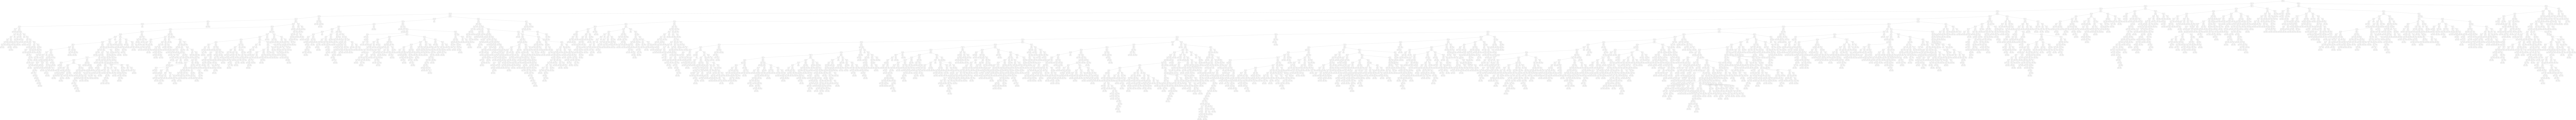

In [36]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng Bank_Data_Tree.dot -o Bank_Data_Tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Bank_Data_Tree.png"))

## Reducing over fitting (Regularization)

In [38]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8874142888741429
0.8899292244175759


**Note:** The performance of the model improved by 7.5% on the testing data by reducing over fitting.  

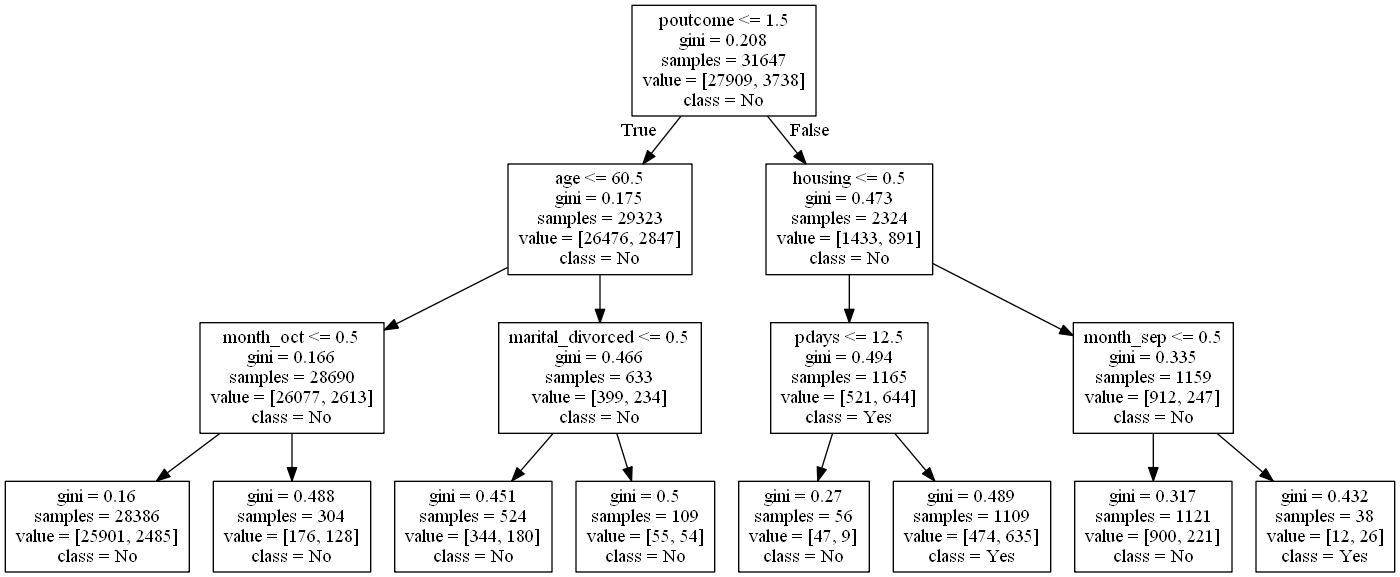

In [39]:
train_char_label = ['No', 'Yes']
Bank_Data_Tree_FileR = open('Bank_Data_Tree_FileR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Bank_Data_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Data_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng Bank_Data_Tree_FileR.dot -o Bank_Data_Tree_FileR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Bank_Data_Tree_FileR.png"))

In [40]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Feature Importance"], index = X_train.columns))

                  Feature Importance
age                         0.139367
job                         0.000000
education                   0.000000
default                     0.000000
balance                     0.000000
housing                     0.194356
loan                        0.000000
contact                     0.000000
day                         0.000000
campaign                    0.000000
pdays                       0.026219
previous                    0.000000
poutcome                    0.511743
marital_divorced            0.006036
marital_married             0.000000
marital_single              0.000000
month_apr                   0.000000
month_aug                   0.000000
month_dec                   0.000000
month_feb                   0.000000
month_jan                   0.000000
month_jul                   0.000000
month_jun                   0.000000
month_mar                   0.000000
month_may                   0.000000
month_nov                   0.000000
m

0.8899292244175759


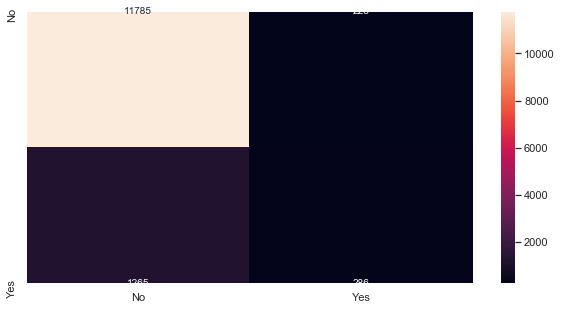

In [41]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<a id  = ensemblelearning></a>
#                             Ensemble Learning - Bagging

**Bagging - Default Model before tuning the key hyper parameters available for the model:**

In [42]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(random_state=1)
bgcl = bgcl.fit(X_train, y_train)

0.8879386611618991


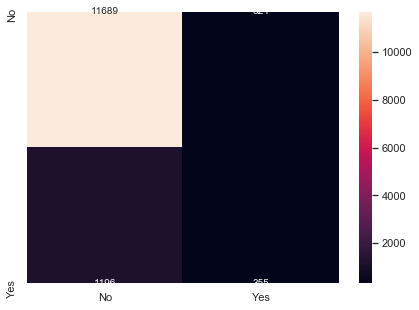

In [43]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Note:** The performance of the bagging model (before tunning of the parameters) does not exceed the base dTreeR model stated above. 

- Base dTreeR model score = 88.99
- Bagging default model score =  88.79

## Tuning the model


While you can easily build a bagging classifier using the default parameters, it is highly recommended that you tune these in order to achieve optimal performance.

**key hyperparameters available:**

base_estimator:
- This parameter defines the underlying model to fit on the random subsets of the dataset. 
- Default (None) - When nothing is specified, the base estimator is a decision tree.

n_estimator:
- This parameter is the number of base estimators to be created.
- The number of estimators should be carefully tuned as a large number would take a very long time to run, while a very small number might not provide the best results
- Default = 10



**Tuning Bagging Model specific parameters**

The parameters 'base_estimators' and 'n_estimator' have the most significant impact on the model and thus were selected for tuning first.

Base_Model Score = 88.79

Started by tuning base_estimator:
- base_esitmator (dTree): Model Score = 88.79
- base_estimators (dTreeR): Model Score = 89.12
- base_estimators (KNeighbors): Model Score = 86.75

In Bagging high complex models such as decision trees benefit the most from the aggregation effect applied in the model, whereas low variance models show little improvement. This is because limiting the size of the base estimator becomes somewhat redundant within the bagging ensemble, since the bootstrap sampling achieves a similar result as limiting the base trees. Bootstrap sampling never exposes the entire dataset to the model algorithm, thus preventing overfitting. The default model dTree is a complex mode with no restrictions on depth thus no need to select a model.  

I performed the above tuning experiments too confirm the dTreeR model produces the best model score of (89.12).  

Next performed tuning of the n_estimators variable:
- n_esitmators (50): Model Score = 89.06
- n_estimators (100): Model Score = 89.11
- n_estimators (500): Model Score = 89.13
- n_estimators (2000): Model Score = 89.12

Optimal performance is often found by bagging 50–500 trees. Data sets that have a few strong predictors typically require less trees; whereas data sets with lots of noise or multiple strong predictors may need more. Using too many trees will not lead to overfitting. However, it’s important to realize that since multiple models are being run, the higher the n_estimator performed the more computational and time requirements there will be.

A n_estimator of 500 (moderate) was determined to be the optimal value producing a Model Score of 89.13 (without adjustment of other paraeters) and reasonable training time. 

**Tuning the model for key hyperparameters testing:**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KN =  KNeighborsClassifier(n_neighbors = 3)

bgcl = BaggingClassifier(base_estimator= KN,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8675906812149808


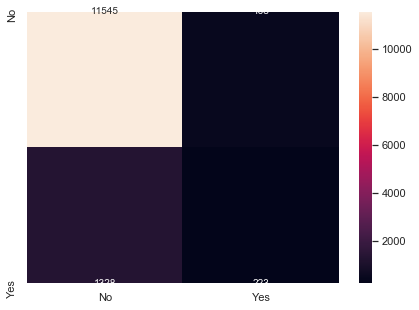

In [45]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Conclusion:**

Overall the final tuned model produced an improvement in the model score of 0.3%, from a model score of 88.79 using the default model parameter selections to a final model score of 89.13.

**Final Model Key Hyper Parameters Selected:**
- base_esitmator = (dTreeR)
- n_estimator: 500

In [46]:
bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators = 500, random_state=1)
bgcl = bgcl.fit(X_train, y_train)

0.8913299911530522


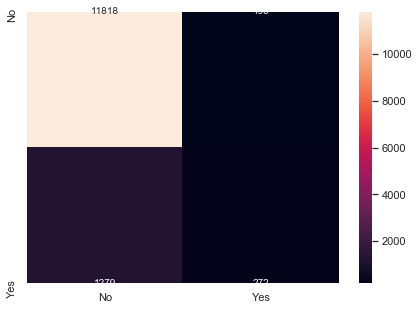

In [47]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Note:** The performance of the optimal bagging model after tunning the key hyperparameters now exceeds the base dTreeR model stated above. 

- Base dTreeR model score = 88.99
- Bagging model score =  89.13

# Ensemble Learning - AdaBoosting

**AdaBoosting - Default Model before tuning the key hyperparameters available for the model:**

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(random_state=1)
abcl = abcl.fit(X_train, y_train)

0.890002948982601


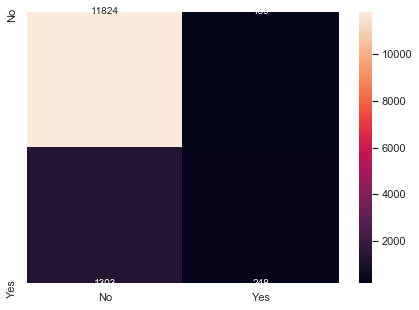

In [49]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Note:** The performance of the boosting model (before tunning of the parameters) slightly exceeds the base dTreeR model stated above. 

- Base dTreeR model score = 88.99
- Boosting default model score =  89.00

## Tuning the model

While you can easily build a ADA_Boosting model using the default parameters, it is highly recommended that you tune these in order to achieve optimal performance.

**key hyper parameters available:**

base_estimators:
- It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.

n_estimators:
- It defines the number of base estimators.
- The default value is 10, but you should keep a higher value to get better performance.

learning_rate:
- This parameter controls the contribution of the estimators in the final combination.
- There is a trade-off between learning_rate and n_estimators.

max_depth:
- Defines the maximum depth of the individual estimator.
- Tune this parameter for best performance.

n_jobs
- Specifies the number of processors it is allowed to use.
- Set value to -1 for maximum processors allowed.

random_state :
- An integer value to specify the random data split.
- A definite value of random_state will always produce same results if given with same parameters and training data.

**Tuning Bagging Model specific parameters**

Boosting is a framework that iteratively improves any weak learning model. Many gradient boosting applications allow you to “plug in” various classes of weak learners at your disposal. In practice however, boosted algorithms almost always use decision trees as the base-learner.

Base_Model Score = 89.00

Started by tuning base_estimator:
- base_estimator (dTree): Model Score = 82.12
- base_estimators (dTreeR): Model Score = 89.02

In Boosting model techniques simple models are most effective. This is beacuse the model build on weak, simple model. The performance of the model is thus decreased when we select complex models such as a decision tree (with no restrictions) as a base_estimator, however the model performance improves when we restrict the max depth of the decision tree. The dTreeR model was selected as the max depth is restricted to 3, which provided the most beneficial model results.

Next performed tuning of the n_estimators variable:
- n_esitmator (20): Model Score = 89.14
- n_esitmator (50): Model Score = 89.03
- n_esitmator (100): Model Score = 88.88

The total number of trees in the sequence or ensemble. The averaging of independently grown trees in bagging makes it very difficult to overfit with too many trees. The accuracy of the boosting ensemble improves rapidly with the number of base estimators however, smaller depth trees are computationally efficient.

The above test tuning cases observed a minimal improvement in the model by increaseing the n_estimator. An n_estimator of 20 was thus selected for computational efficiency. 

The remaining parameters address the minimum number of observations in terminal nodes also control the complexity of each tree.
Marginal improvement in the model was observed from tuning the remaining parameters, thus the default parameters were selected. 



**Conclusion:**

Overall the final tuned model produced an improvement in the model score of 0.14%, from a model score of 89.00 using the default model parameter selections to a final model score of 89.14.

**Final Model Key Hyperparameters Selected:**
- base_esitmator = (dTreeR)
- n_estimator: 20

In [50]:
abcl = AdaBoostClassifier(base_estimator= dTreeR, n_estimators=20, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8914774402831024


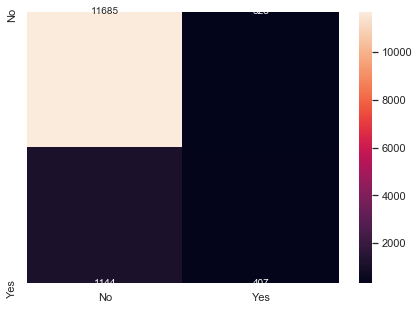

In [51]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Note:** The performance of the boosting model slightly exceeds the base dTreeR model stated above. 

- Base dTreeR model score = 88.99
- Boosting default model score =  89.14

#                     Ensemble Learning - GradientBoost

**GradientBoost (GDM) - Default Model before tuning the key hyperparameters available for the model:**

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.893320554408729


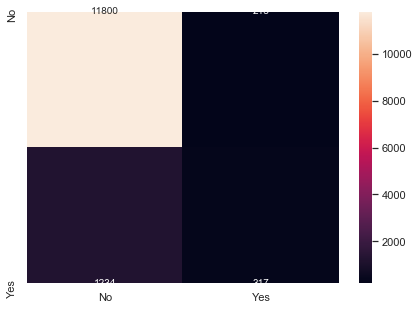

In [53]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Note:** The performance of the Gradient Boosting model (before tunning of the parameters) slightly exceeds the base dTreeR model stated above. 

- Base dTreeR model score = 88.99
- Gradient Boosting default model score =  89.33

## Tuning the model

While you can easily build a Gradient Boosting model using the default parameters, it is highly recommended that you tune these in order to achieve optimal performance.

**key hyperparameters available:**

min_samples_split
- Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
- Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.

min_samples_leaf
- Defines the minimum samples required in a terminal or leaf node.
- Generally, lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in the majority will be very small.

min_weight_fraction_leaf
- Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.

max_depth
- The maximum depth of a tree.
- Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
- Should be tuned using CV.

max_leaf_nodes
- The maximum number of terminal nodes or leaves in a tree.
- Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
- If this is defined, GBM will ignore max_depth.

max_features
- The number of features to consider while searching for the best split. These will be randomly selected.
- As a thumb-rule, the square root of the total number of features works great but we should check up to 30-40% of the total number of features.
- Higher values can lead to over-fitting but it generally depends on a case to case scenario.

**Tuning tree-specific parameters**

The parameters 'max_depth' and 'min_samples_split' have the most significant impact on the model and thus were selected for tuning first.

Default Base_Model Score = 89.33

Started by tuning max_depth:
- max_depth (5): Model Score = 89.31
- max_depth (10): Model Score = 89.11
- max_depth (15): Model Score = 88.86

Smaller depth trees such as decision stumps are computationally efficient however, higher depth trees allow the algorithm to capture unique interactions but also increase the risk of over-fitting.

A max_depth of 5 (lower) was determined to be the optimal value producing a Model Score of 89.31. 

Next performed tuning of the min_sample variable:
- min_sample_split (200): Model Score = 89.28
- min_sample_split (500): Model Score = 89.36

A min_samples_split of 500 (moderate) was determined to be the optimal value producing a Model Score of 90.614. 

n_estimators: 
- n_esitmator (50): Model Score = 89.32
- n_esitmator (100): Model Score = 89.36

The accuracy of the boosting ensemble improves rapidly with the number of base estimators however, with Gradiant Boosting models there is a risk of overfitting, smaller depth trees are also computationally efficient.

The remaining parameters address the minimum number of observations in terminal nodes also control the complexity of each tree. Since we tend to use shorter trees for Gradiant Boosting Models this rarely has a large impact on performance, thus the default parameters were selected. 

**Conclusion:**

Overall the final tuned model produced an improvement in the model score of 0.2%, from a model score of 89.33 using the default model parameter selections to a final model score of 89.36.

**Final Model Keyhyper Parameters Selected:**
- max_depth = 5
- min_sample_split = 500
- n_estimator = 100

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(max_depth = 5, min_samples_split = 500, n_estimators = 100, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8936154526688292


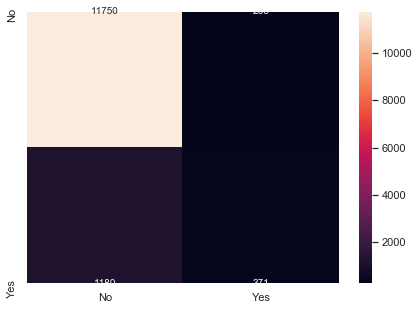

In [55]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Note:** The performance of the Gradient Boosting model slightly exceeds the base dTreeR model stated above. 

- Base dTreeR model score = 88.99
- Gradient Boosting model score =  89.36

# Ensemble RandomForest Classifier

**Random Forest - Default Model before tuning the key hyperparameters available for the model:**

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 10, random_state=1)
rfcl = rfcl.fit(X_train, y_train)

0.8883072839870245


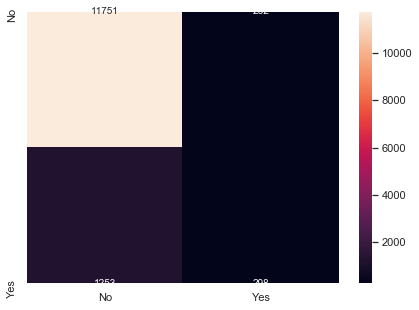

In [57]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Note:** The performance of the RandomForest model (before tunning of the parameters) is slightly worse than the base dTreeR model stated above. 

- Base dTreeR model score = 88.99
- RandomForest default model score =  88.83

## Tuning the model


Random forests usually perform quite well with the default settings, however you are able to tune the below key hyper parameters availiable in order to achieve optimal performance.

**key Hyperparameters available:**

n_estimator:
- The parameter defines the number of decision trees to be created in a random forest.
- Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.
- Default = 10n_estimators:

In practice, limiting the size of the base estimator is somewhat redundant within a bagging ensemble, since the bootstrap sampling achieves a similar result as limiting the base trees.

criterion:
- It defines the function that is to be used for splitting.
- The function measures the quality of a split for each feature and chooses the best split.

max_features :
- It defines the maximum number of features allowed for the split in each decision tree.
- Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.

max_depth:
- Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.

min_samples_split:
- Used to define the minimum number of samples required in a leaf node before a split is attempted.
- If the number of samples is less than the required number, the node is not split.

min_samples_leaf:
- This defines the minimum number of samples required to be at a leaf node.
- Smaller leaf size makes the model more prone to capturing noise in train data.

max_leaf_nodes:
- This parameter specifies the maximum number of leaf nodes for each tree.
- The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.

n_jobs:
- This indicates the number of jobs to run in parallel.
- Set value to -1 if you want it to run on all cores in the system.

random_state:
- This parameter is used to define the random selection.
- It is used for comparison between various models.

**Tuning Random Forrest Model specific parameters**

The parameters 'max_features' and 'n_estimator' have the most significant impact on the model and thus were selected for tuning first.

Default Base_Model Score = 88.83

Started by tuning n_estimator:

The first consideration is the number of trees within your random forest. More trees provide more robust and stable error estimates, however the impact on computational efficiency decreases with increased number of trees.

- n_esitmators (50): Model Score = 89.09
- n_estimators (100): Model Score = 89.09
- n_estimators (500): Model Score = 89.32
- n_estimators (2000): Model Score = 89.24

A n_estimator of 500 (moderate) was determined to be the optimal value producing a Model Score of 90.79 (without adjustment of other paraeters) and reasonable training time. 

Next performed tuning of the max_features variable:
- max_features (10): Model Score = 89.25
- max_features (15): Model Score = 89.28
- max_features (13): Model Score = 89.19

This parameter helps to balance low tree correlation with reasonable predictive strength. When there are fewer relevant predictors (e.g., noisy data) a higher value of max_features tends to perform better.When there are many relevant predictors, a lower  max_features might perform better.

The remaining hyperparameters that allow us to control the depth and complexity of the individual trees and include hyperparameters such as node size, max depth, max number of terminal nodes, or the required node size to allow additional splits. The default values for the remaining parameter values tend to produce good results

**Conclusion:**

Overall the final tuned model produced an improvement in the model score of 0.5%, from a model score of 88.83 using the default model parameter selections to a final model score of 89.32.

**Final Model Key Hyperparameters Selected:**
- n_estimator = 500

In [58]:
rfcl = RandomForestClassifier(random_state=1, n_estimators = 500)
rfcl = rfcl.fit(X_train, y_train)

0.8931731052786789


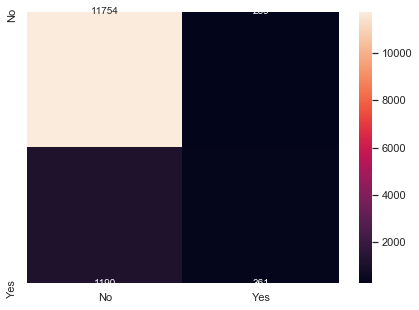

In [59]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Note:** The performance of the RandomForest model now slightly exceeds the base dTreeR model stated above. 

- Base dTreeR model score = 88.99
- RandomForest model score =  89.32